# <font color='purple'>04-Polytropes</font> (Template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [8]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. Below are a few functions that we will need -- please execute them

### a. MESA evolution code

MESA is an open-source code that performs detailed calculations for the structure and evolution of stars. Throughout the course, we will be using models calcualted with MESA -- if you are interested, you can find more details here: http://mesastar.org/. 

And here's a little function that will allow you to read a Solar model calculated from the MESA code.

In [9]:
def read_model(file):

    cols = np.array([1,2,3,4,5,29,66])-1
    return np.genfromtxt(file, skip_header=5, names=True, usecols = cols)

### b. Numerical solution of the Lane-Emden equation

Here I provide a function to numerically calculate the $\theta(\epsilon)$ function for a polytropic index $n>1$, such that

$$\rho(r) = \rho_c \theta(r)^n.$$

If you are interested in the numerical procedure, see Hansen & Kawaler sec 7.2.2.

In [10]:
def Lane_zp(x, y, z, n):
    if y < 0:
        y = 0
    return -2.0 * z / x - y**n

def poly_num(n, h=0.01, x_end=16.0, xinit=0.00001):
    # Initialize the step and the ending eps value
    # n: polytrope index
    # h: 0.05 step size
    # x_end: 16.0 

    # Initialize the starting value
    x = xinit
    y = 1 - ( 1.0/6.0 * x**2)  + ( n/120.0 * x**4 ) - ( n*(8*n-5)/15120.0 * x**6 )
    z = - ( 1.0/6.0 * 2 * x ) + ( n/120.0 * 4 * x**3 )  - ( n*(8*n-5)/15120.0 * 6 * x**5 )
    zp = - ( 1.0/6.0 * 2 ) + ( n/120.0 * 12 * x**2 )  - ( n*(8*n-5)/15120.0 * 6*5 * x**4 )

    eps = np.array([h])
    theta = np.array([y])
    theta_prim = np.array([z])

    # Make the calculation until we reach X_end, of theta goes to zero
    while (x < x_end) and (y>0):
    
        K1 = h * z
        L1 = h * Lane_zp(x, y, z, n)
        K2 = h * (z + L1/2.0)
        L2 = h * Lane_zp(x+h/2.0, y+K1/2.0, z+L1/2.0, n)
        K3 = h * (z + L2/2.0)
        L3 = h * Lane_zp(x+h/2.0, y+K2/2.0, z+L2/2.0, n)
        K4 = h * (z + L3/2.0)
        L4 = h * Lane_zp(x+h, y+K3, z+L3, n)
    
        y = y + K1/6.0 + K2/3.0 + K3/3.0 + K4/6.0
        z = z + L1/6.0 + L2/3.0 + L3/3.0 + L4/6.0
    
        x = x+h
    
        eps = np.append(eps, x)
        theta = np.append(theta, y)
        theta_prim = np.append(theta_prim, z)
        
    return eps[0:eps.size-1], theta[0:theta.size-1], theta_prim[0:theta_prim.size-1]

## 2. Analytical solutions for polytrops

### a. Let's define some function that return $\theta(r)$ for the analytical solutions of the Lane-Emden equation

For n = 0,

$$\theta(\epsilon) = 1 - \frac{\epsilon^2}{6}.$$

For n = 1, 

$$\theta(\epsilon) = \frac{\sin \epsilon}{\epsilon}$$

For n = 5,

$$\theta(\epsilon) = \frac{1.0}{(1.0+\epsilon^{2}/3)^{1/2}}$$

In [11]:
#-------------------------------------------------------
# In class: we will learn how to define functions



### b. Let's now look at what these solutions look like

We will first plot the analytic solutions, and then compare to the numerical solutions.

> **TODO** from now on: <font color='red'>please properly label the figure axes for your all of your notebooks</font>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(26.597222222222214, 0.5, '$\\theta(r)$')

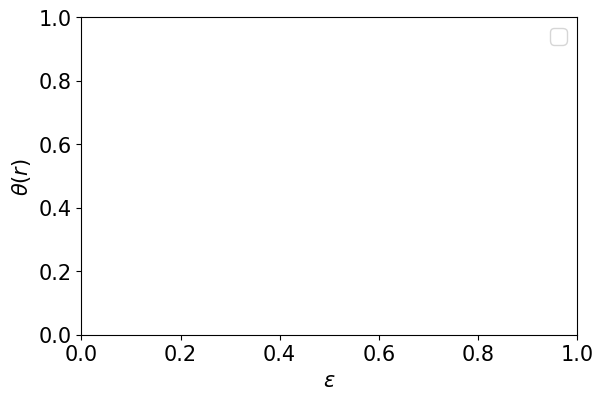

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.rcParams.update({'font.size': 15})

ax.set_ylim(0,1)
#---------------------------------------
#---------------------------------------
# In class

######################
# Analytical solutions

# Define a set of eps values

######################





######################
# numerical solutions
######################

# the function poly_num(n) will return
# an array of eps values, an array of theta values, 
# and an array of dTheta/dEps.
# The last element of the array is eps_1 (if n<5)



    

#---------------------------------------
#---------------------------------------
ax.legend(loc=0, fontsize=15)
plt.tight_layout()
#-----------------------------------------
# Not included, they can do this themselves from now on. 
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\theta(r)$')

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

## 3. Comparison with the density profile of the Sun

### a.  In class: what does the density profile look like for various polytropes compared to the Sun?

I provide you with a plot of $\rho / \rho_c$ for a detailed model of the Sun, calculated by MESA.

The numerical calculation returns $\epsilon$ and $\theta(\epsilon)$. We need to transform these into $r/R_\star$ and $\rho/\rho_c$.

> **TODO** <font color='red'>: Summarize the procedure here in words and math. Use Latex formatting to render the math</font>

> **TODO**: <font color="red">Using the code below, find out which polytropic index $n$ is a best match for the Sun. (Note that the polytropic index can be a fractional number)</font>

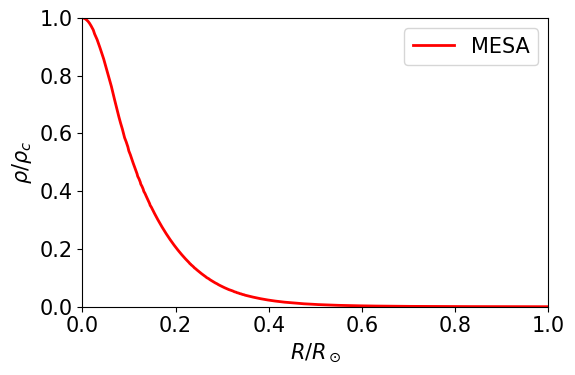

In [13]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.rcParams.update({'font.size': 15})

ax.set_xlabel(r'$R / R_\odot$')
ax.set_ylabel(r'$\rho / \rho_c$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

# MESA solar model
mesa = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-F2024/main/Book/L04andL05-Polytropes/04-MESAdatafile.txt')
# In the mesa model, the first element [0] correspond to the surface, 
# and the last element [mesa.size-1] correspond to the center.
mesa_r = 10**(mesa['logR']-mesa['logR'][0])
mesa_rho =  10**(mesa['logRho']-mesa['logRho'][mesa.size-1]) # the density is given in cgs
ax.plot(mesa_r, mesa_rho, c="red", lw=2, label='MESA')

#---------------------------------------
#---------------------------------------
# In class

# numerical solutions

    
    
    
#---------------------------------------   
#---------------------------------------
ax.legend(loc=0, fontsize=15)
plt.tight_layout()

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>



### b. At home: what is the central density for these polytropes?

In the plot below, I show the density, in $\mathrm{g}/\mathrm{cm}^3$, of the the detailed MESA solar model. 
 
> **TODO** In order to transform $\rho/\rho_c$ from above into a numerical density, you need to find the central density in $\mathrm{g}/\mathrm{cm}^3$. 
>
> **Hint**: before coding like a maniac, find an expression for the central density that is a function of only $M_\odot$ and $R_\odot$ -- it becomes a much elegant expression with a cool meaning, if you remember that an average density of total volume / total mass...
>
> Include your derivation here (you can start from the set of 3 equations that are on the last slide from class).

 
 

> **TODO**: in the code below, add curves for a few values of $n$, like we did in part 3a. Then find visualy the $n$ index that matches the central density of the sun the best. Use the astropy unit and constant packages, like we did on Tuesday.

Note that the numerical solution, the function poly_num(n) will return: 
1. an array of $\epsilon$ values, 
2. an array of $\theta(\epsilon)$ values, 
3. an array of $\frac{d\theta(\epsilon)}{d\epsilon}$ (or $\theta'(\epsilon)$)

The last element of the arrays correspond to $\epsilon_1$ (if $n<5$). Therefore the element `theta_p[-1]` corresponds to $\theta'(\epsilon_1)$

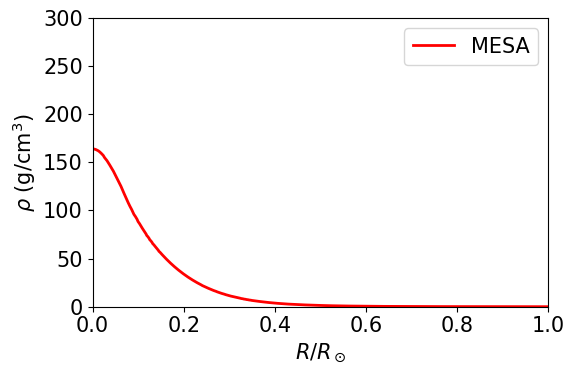

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.rcParams.update({'font.size': 15})

ax.set_xlim(0,1)
ax.set_ylim(0,300)

# MESA solar model
mesa = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-F2024/main/Book/L04andL05-Polytropes/04-MESAdatafile.txt')
# In the mesa model, the first element [0] correspond to the surface, 
# and the last element [mesa.size-1] correspond to the center.
mesa_r = 10**(mesa['logR']-mesa['logR'][0])
mesa_rho =  10**(mesa['logRho']) # the density is in cgs units.
ax.plot(mesa_r, mesa_rho, c="red", lw=2, label='MESA')

ax.set_xlabel(r'$R / R_\odot$')
ax.set_ylabel(r'$\rho$ (g/cm$^3$)')

#---------------------------------------
#---------------------------------------
# at home






#-----------------------------
ax.legend(loc=0, fontsize=15)
plt.tight_layout()

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

## 4. Learning reflection

> **TODO**: <font color='red'>Please write a small reflection on what you have learned and why. 
> 
> Suggestions: how does this notebook provide practice for the learning goal of this lecture? how does this topic fits within the learning goals of this course (could be science and/or techniques!), and how does it relates to other things that you have learned in other courses? 